Third step: could we forsee drugs uses for someone depends on variables ?

In [1]:
import numpy as np
import pandas as pd


data=pd.read_csv('okcupid_treat.csv')

data=pd.get_dummies(data=data, columns=['corpus'])
data=data.dropna(axis=0)

print(data.shape)
print(data.columns)



(59943, 95)
Index(['age', 'drinks', 'drugs', 'height', 'income', 'sex', 'smokes', 'status',
       'body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_full figured',
       'body_type_other_body', 'body_type_skinny', 'body_type_thin',
       'education_college/university',
       'education_dropped out of college/university',
       'education_graduated from college/university',
       'education_graduated from high school',
       'education_graduated from law school',
       'education_graduated from masters program',
       'education_graduated from ph.d program',
       'education_graduated from space camp',
       'education_graduated from two-year college',
       'education_other_education', 'education_working on college/university',
       'education_working on masters program',
       'education_working on ph.d program',
       'education_working on two-year college', 'location_oakland, california',
     

First, some vizualising to see and notice some variables matching

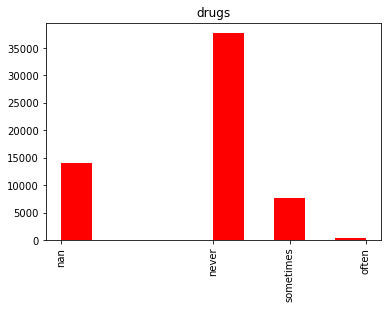

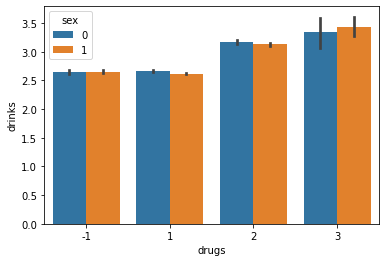

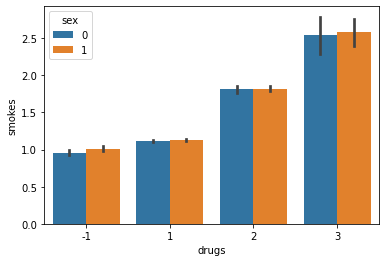

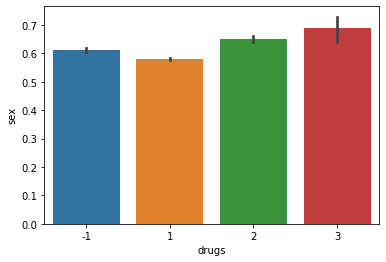

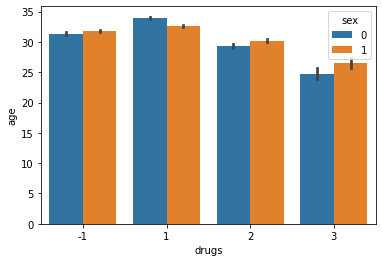

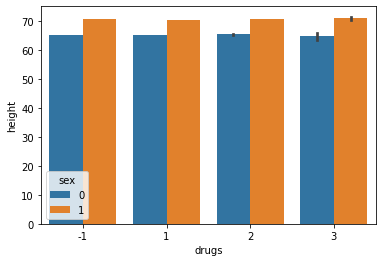

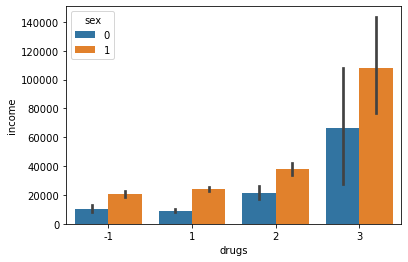

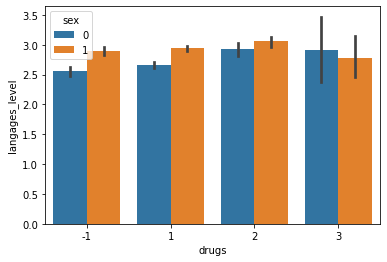

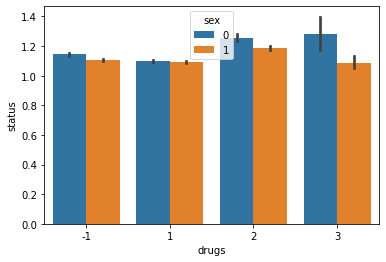

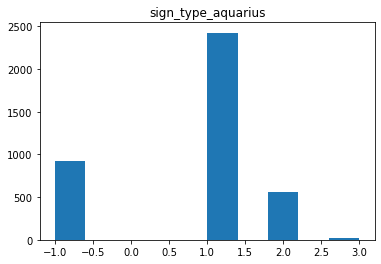

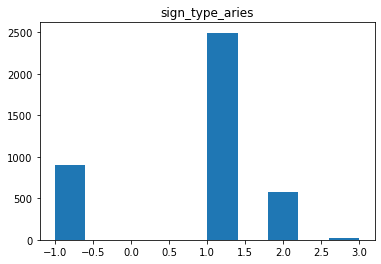

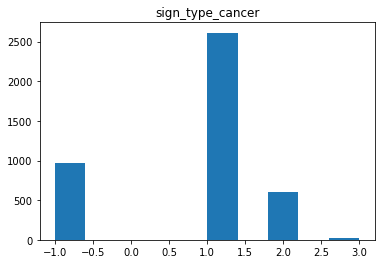

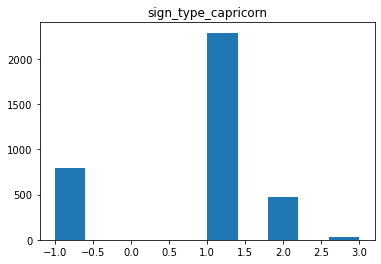

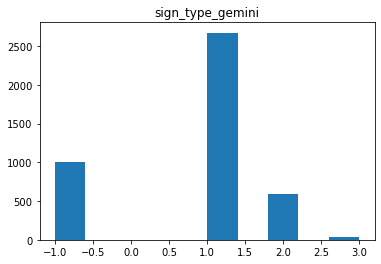

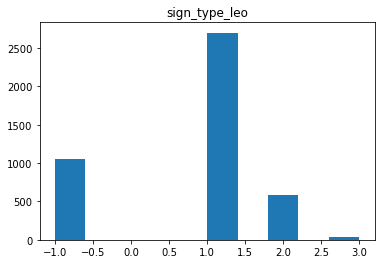

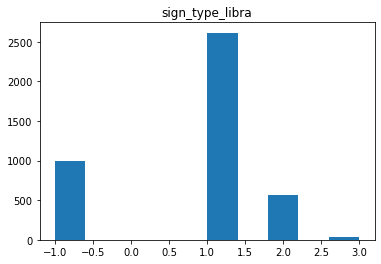

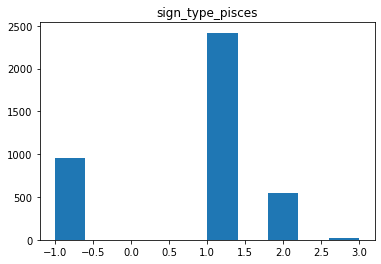

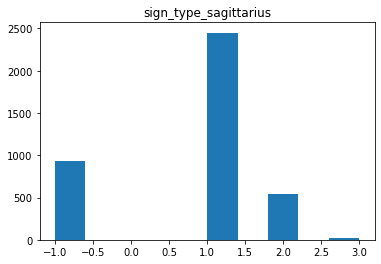

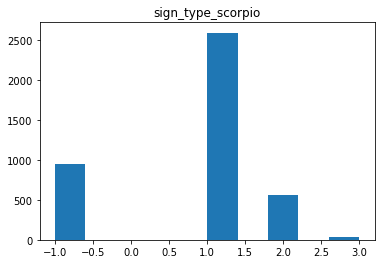

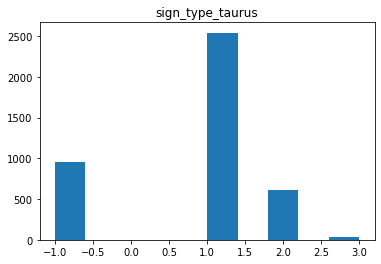

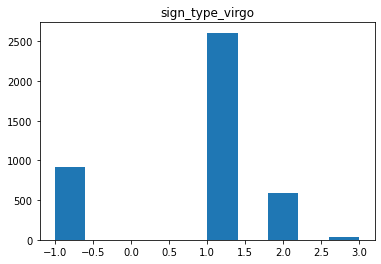

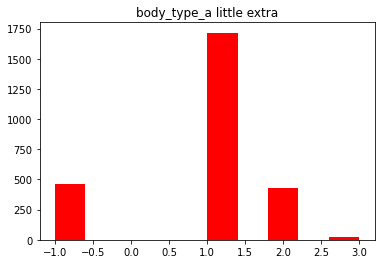

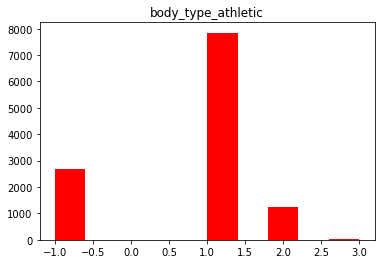

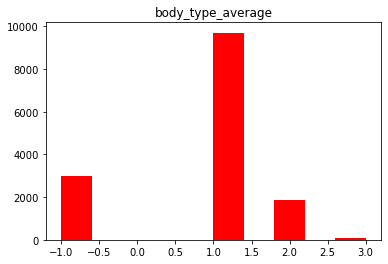

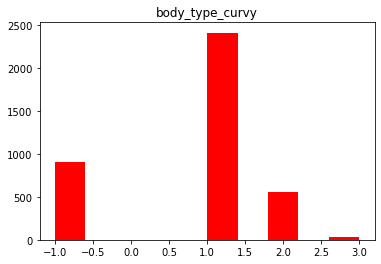

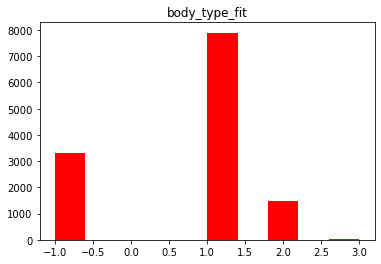

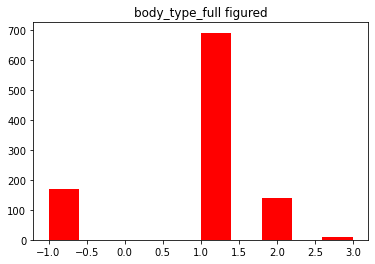

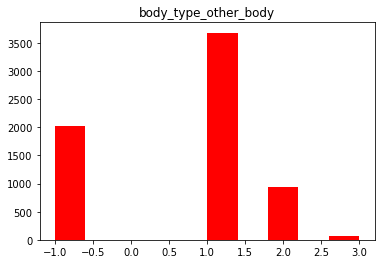

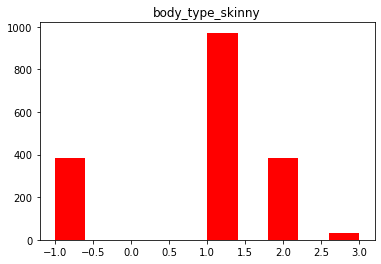

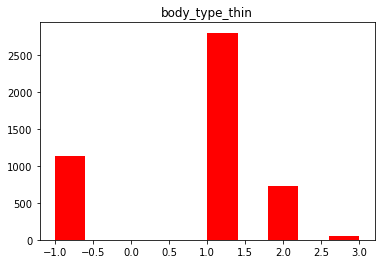

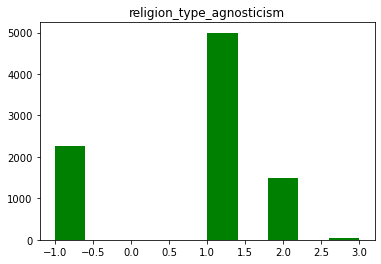

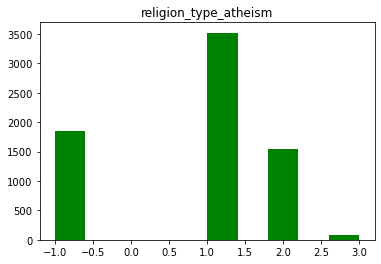

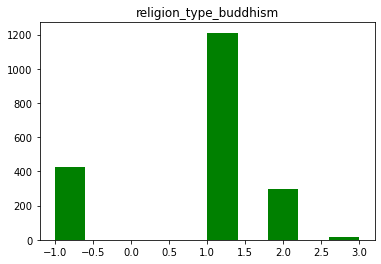

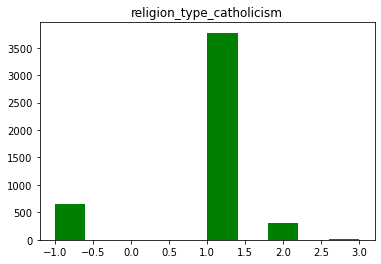

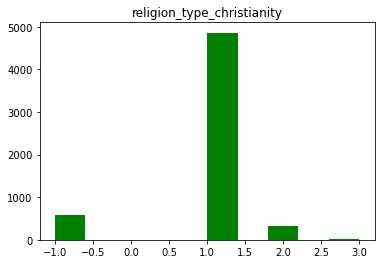

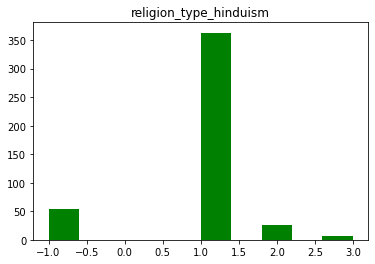

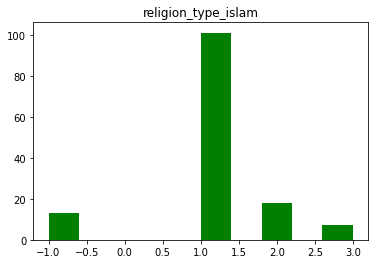

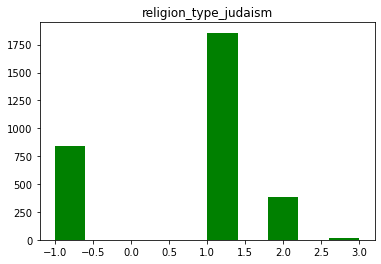

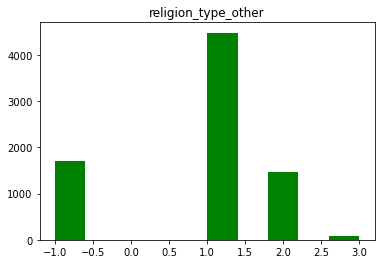

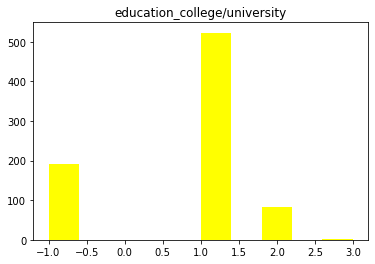

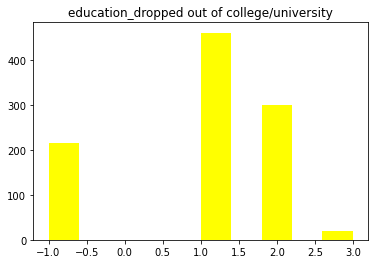

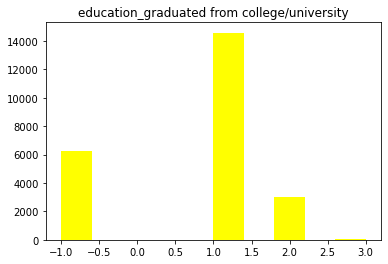

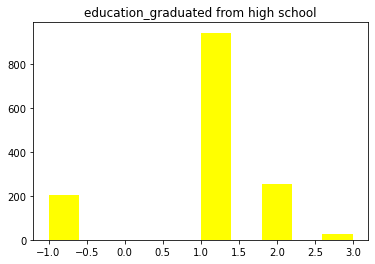

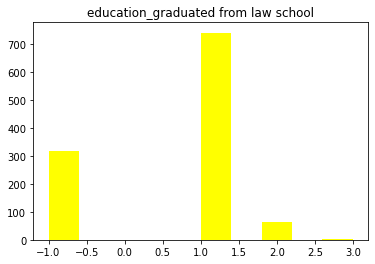

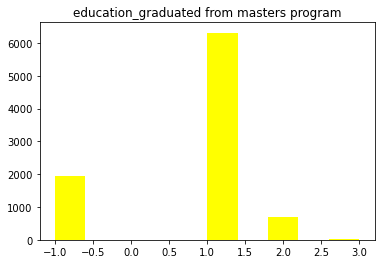

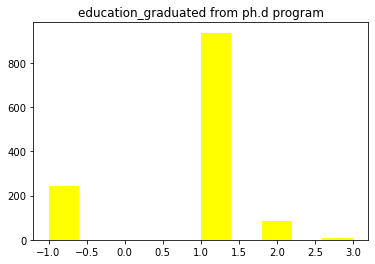

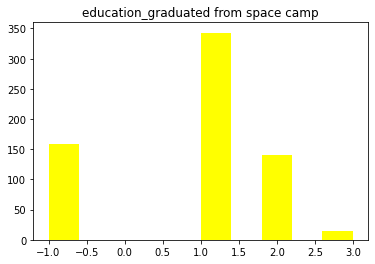

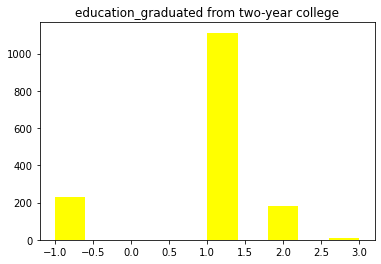

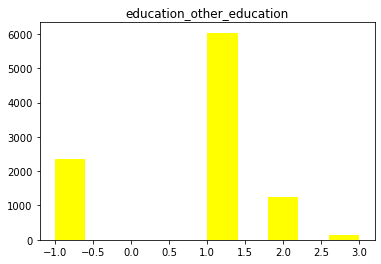

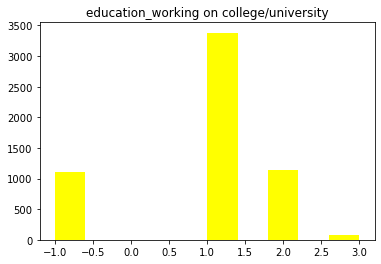

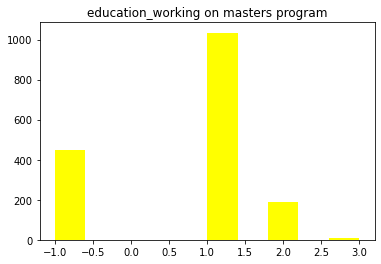

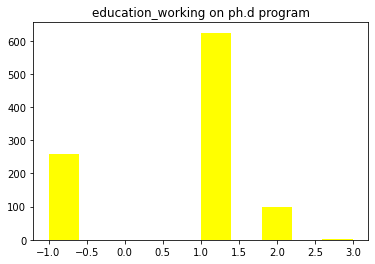

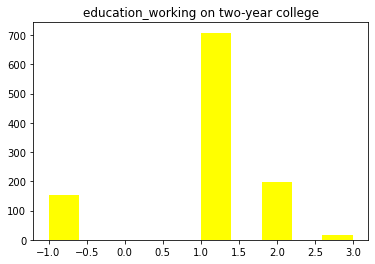

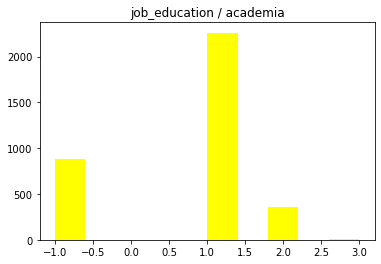

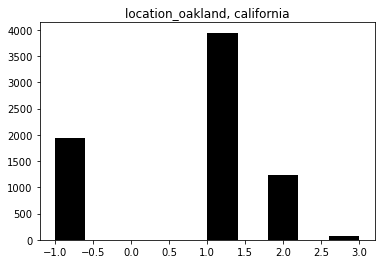

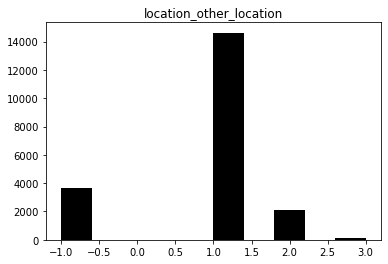

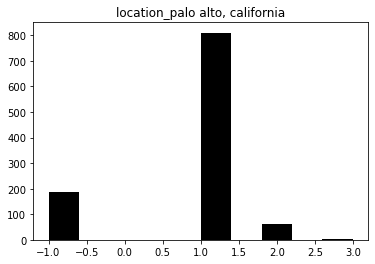

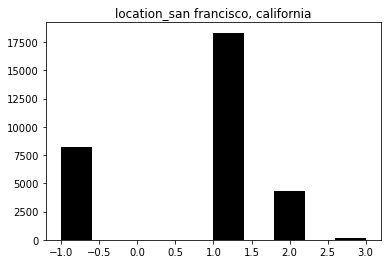

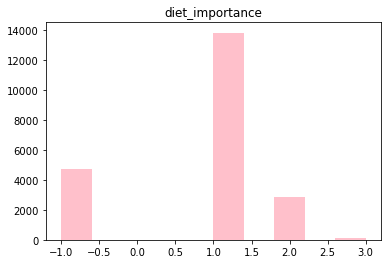

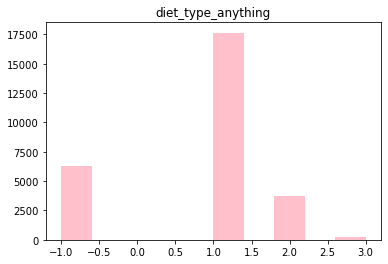

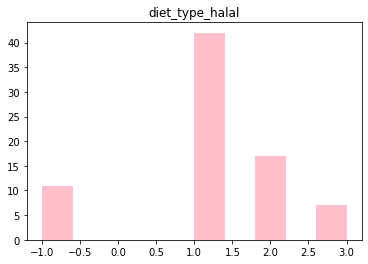

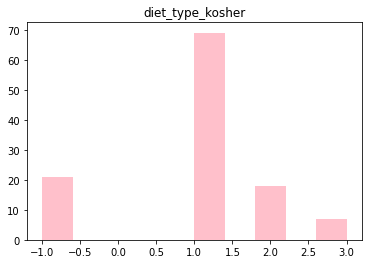

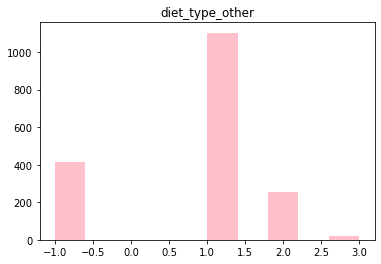

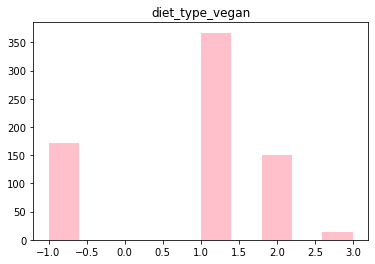

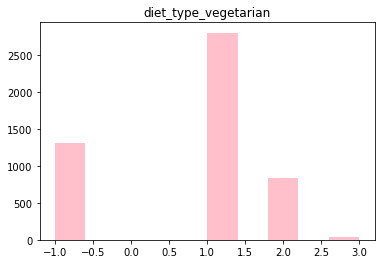

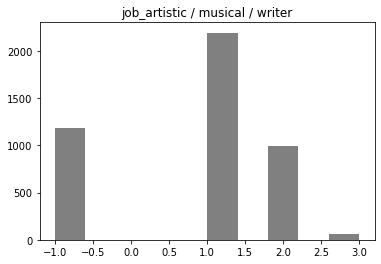

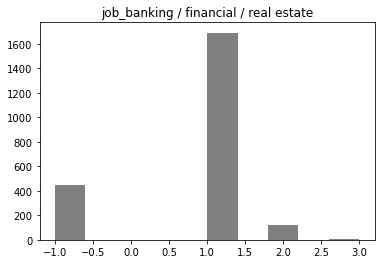

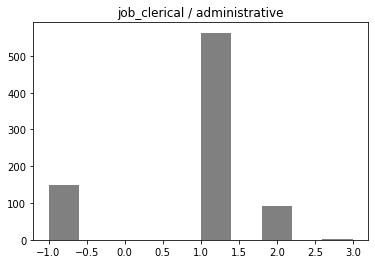

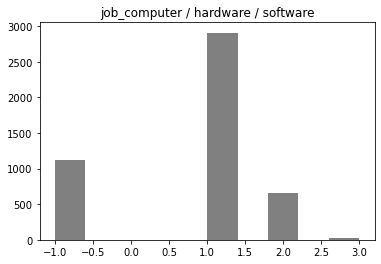

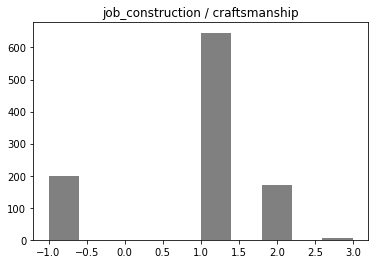

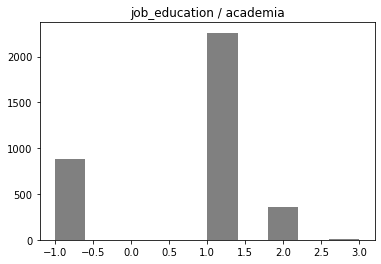

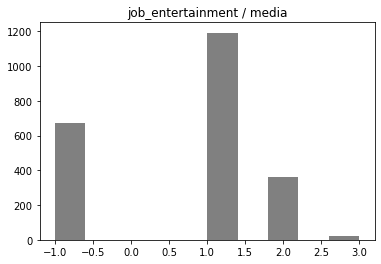

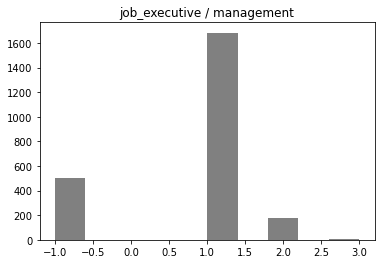

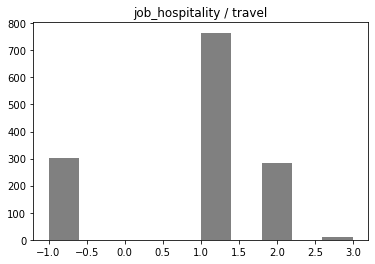

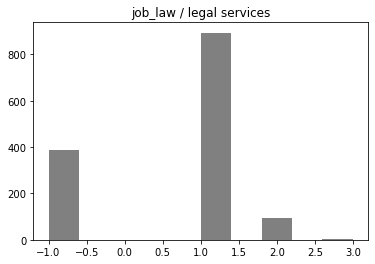

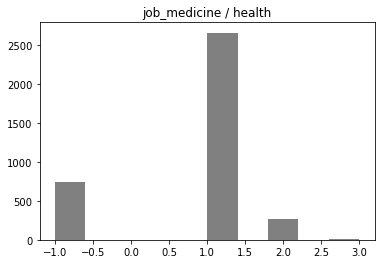

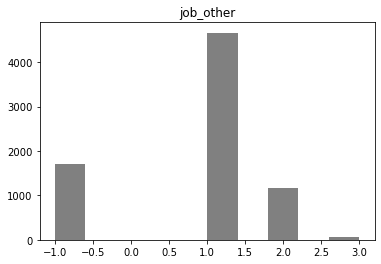

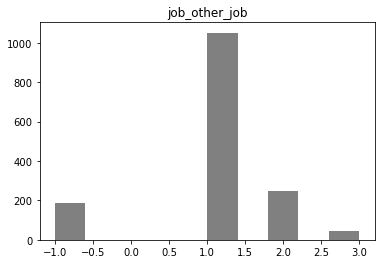

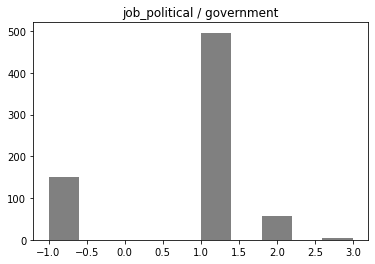

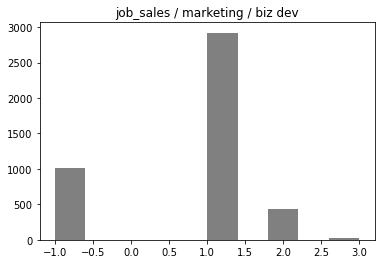

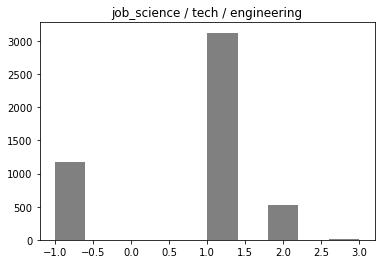

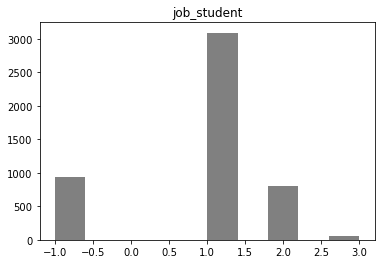

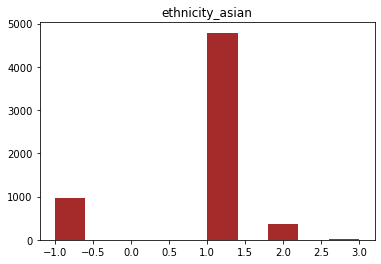

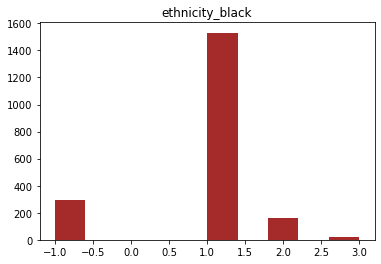

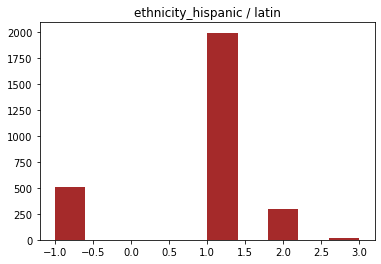

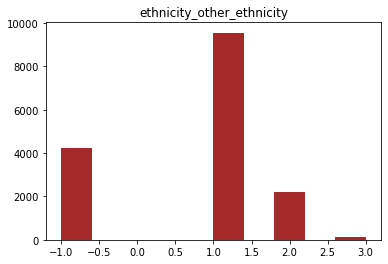

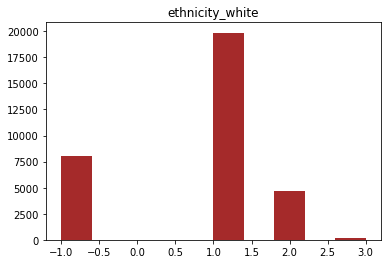

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# how about drugs distribution ?


ax=plt.subplot()
plt.title('drugs')
plt.hist(data.drugs, color='red')
ax.set_xticks([ -1, 1, 2, 3])
ax.set_xticklabels(['nan', 'never', 'sometimes', 'often'], rotation=90)
plt.show()
plt.clf()


# now we are seeking correlation between people who smoke, take drugs and drinks.

fig_1=sns.barplot(data=data, x='drugs', y='drinks', hue='sex')
plt.savefig('fig_1.pdf')
plt.show()
plt.clf()
fig_2=sns.barplot(data=data, x='drugs', y='smokes', hue='sex')
plt.savefig('fig_2.pdf')
plt.show()
plt.clf()
fig_3=sns.barplot(data=data, x='drugs', y='sex')
plt.savefig('fig_3.pdf')
plt.show()
plt.clf()


# now with age, height and income.

fig_4=sns.barplot(data=data, x='drugs', y='age', hue='sex')
plt.savefig('fig_4.pdf')
plt.show()
plt.clf()


fig_5=sns.barplot(data=data, x='drugs', y='height', hue='sex')
plt.savefig('fig_5.pdf')
plt.show()
plt.clf()

fig_6=sns.barplot(data=data, x='drugs', y='income', hue='sex')
plt.savefig('fig_6.pdf')
plt.show()
plt.clf()


# now, drugs and langage level

fig_7=sns.barplot(data=data, x='drugs', y='langages_level', hue='sex')
plt.savefig('fig_7.pdf')
plt.show()
plt.clf()

# how about status ?

fig_8=sns.barplot(data=data, x='drugs', y='status', hue='sex')
plt.savefig('fig_8.pdf')
plt.show()
plt.clf()

# now we will compare drugs distribution between different signs.

sign_list=[]
for name in data.columns:
    if name.find('sign_type')!=-1:
        sign_list.append(name)
        
for name in sign_list:
    plt.hist(data[data[name]==1]['drugs'])
    plt.title(name)
    plt.show()
    plt.clf()
    
# the same, we compare drugs distribution between different body types.

body_list=[]
for name in data.columns:
    if name.find('body_type')!=-1:
        body_list.append(name)
        
for name in body_list:
    plt.hist(data[data[name]==1]['drugs'], color='red')
    plt.title(name)
    plt.show()
    plt.clf()
 

# the same, we compare drugs distribution between different religion types.

religion_list=[]
for name in data.columns:
    if name.find('religion_type')!=-1:
        religion_list.append(name)
        
for name in religion_list:
    plt.hist(data[data[name]==1]['drugs'], color='green')
    plt.title(name)
    plt.show()
    plt.clf()   
    
    
# the same, we compare drugs distribution between different education types.

education_list=[]
for name in data.columns:
    if name.find('education')!=-1:
        education_list.append(name)
        
for name in education_list:
    plt.hist(data[data[name]==1]['drugs'], color='yellow')
    plt.title(name)
    plt.show()
    plt.clf()
    
    
# the same, we compare drugs distribution between different locations.

location_list=[]
for name in data.columns:
    if name.find('location')!=-1:
        location_list.append(name)
        
for name in location_list:
    plt.hist(data[data[name]==1]['drugs'], color='black')
    plt.title(name)
    plt.show()
    plt.clf()
    
# the same, we compare drugs distribution between different diet types.

diet_list=[]
for name in data.columns:
    if name.find('diet')!=-1:
        diet_list.append(name)
        
for name in diet_list:
    plt.hist(data[data[name]==1]['drugs'], color='pink')
    plt.title(name)
    plt.show()
    plt.clf()
    
    
# the same, we compare drugs distribution between different jobs.

job_list=[]
for name in data.columns:
    if name.find('job')!=-1:
        job_list.append(name)
        
for name in job_list:
    plt.hist(data[data[name]==1]['drugs'], color='grey')
    plt.title(name)
    plt.show()
    plt.clf()
    
# the same, we compare drugs distribution between different ethnicity.

ethnicity_list=[]
for name in data.columns:
    if name.find('ethnicity')!=-1:
        ethnicity_list.append(name)
        
for name in ethnicity_list:
    plt.hist(data[data[name]==1]['drugs'], color='brown')
    plt.title(name)
    plt.show()
    plt.clf()


When we look at those graphs, we could notice that:

- on drugs distribution the best is 'sometimes'. Then it's 'never' and the last one is 'often', but not very under 'never'.

- it seems to have a link between 'drugs' and: 'age', 'drinks', 'smokes', 'income' and 'sex'. 'status' seems to have a slight role too.

- 'sign' is unneeded because all of the several signs seems to have the same distribution.

- 'body_type' seems to be more useful because distribution changes for some body types.

- it is the same for the others, excepted for ethnicity.

First, we have to split our data on a train set and a test set and preprocess it too.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# we drop nan drugs data

data=data[data['drugs']!=-1]

# split data with a dataset and labels

labels=data.loc[:, 'drugs']
dataset=data.drop(['drugs'], axis=1)

# preprocessing

preprocess=MinMaxScaler()
dataset_scaled=preprocess.fit_transform(dataset)

# make a train set and a test set

x_train, x_test, y_train, y_test=train_test_split(dataset_scaled, labels, test_size=0.2, random_state=911)

# KNN 

KNN=KNeighborsClassifier(n_neighbors=60, weights='distance')
KNN.fit(x_train, y_train)
score_KNN=KNN.score(x_test, y_test)
print(score_KNN)
 
# best score around 60 neighbors and weight distance. Score=82%

# NB

NB=CategoricalNB()
NB.fit(x_train, y_train)
score_NB=NB.score(x_test, y_test)
print(score_NB)
  
# Score=81%

# RandomForest

RFC=RandomForestClassifier(n_estimators=200)
RFC.fit(x_train, y_train)
score_RFC=RFC.score(x_test, y_test)
print(score_RFC)

# Score=84% with 200 trees

0.8232857298593699
0.8112940150441513
0.8404011773683637


now we keep our best model with randomforest and we will see variables importances to check if it is the same with draws at the beginning. I have not used GridsearchCV but i have used several random_states, and the score remains almost the same.

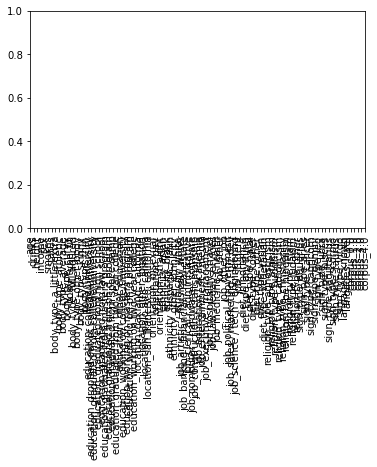

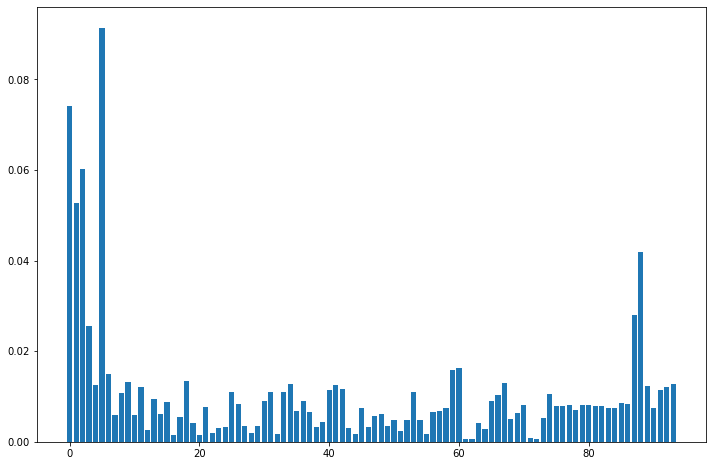

In [5]:

var_names=dataset.columns
feature_importance=RFC.feature_importances_
ax=plt.subplot()
plt.figure(figsize=(12, 8))
plt.bar(range(len(var_names)), feature_importance)
ax.set_xticks(range(len(var_names)))
ax.set_xticklabels(var_names, rotation=90)
plt.show()

When we keep an eye on it, we notice importances of those variables in that order:age, height, smokes, drinks, langages_level, langages_known, diet_type_anything, diet_type_importance, education graduated college/university.At last we will use the same model with only those variables to see the difference. It's funny 'height' is used but we have not noticed its imortance on our graphs...

In [6]:
lab=data['drugs']
dat=data[['age', 'height', 'smokes', 'drinks', 'langages_level', 'langages_known', 'diet_type_anything', 'diet_importance', 'education_graduated from college/university']]

prepro=MinMaxScaler()
dat_pre=prepro.fit_transform(dat)

X_train, X_test, Y_train, Y_test=train_test_split(dat_pre, lab, test_size=0.2, random_state=911)

RFC_light=RandomForestClassifier(n_estimators=200)
RFC_light.fit(X_train, Y_train)
print(RFC_light.score(X_test, Y_test))

0.8130382644718195


score is worst. We have lost 3 %. We will do the contrary, we will drop the weakest variables only rather than keeping only the best ones. For that we will write a little filter to get rid of the weakest features.

In [7]:

feature_weak_index=[]
for val in list(feature_importance):
    if val<0.005:
        feature_weak_index.append(list(feature_importance).index(val))
      

features_drop=[]
for val in feature_weak_index:
    features_drop.append(dataset.columns[val])
    


lab_2=data['drugs']
dat_2=data.drop(['drugs'], axis=1)
dat_2=dat_2.drop(features_drop, axis=1)
print(dat_2.columns)

pre_2=MinMaxScaler()
dat_2_pre=pre_2.fit_transform(dat_2)

xx_train, xx_test, yy_train, yy_test=train_test_split(dat_2_pre, lab_2, test_size=0.2, random_state=911)

RFC_2=RandomForestClassifier(n_estimators=200)
RFC_2.fit(xx_train, yy_train)
print(RFC_2.score(xx_test, yy_test))


        

Index(['age', 'drinks', 'height', 'income', 'sex', 'smokes', 'status',
       'body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_other_body',
       'body_type_skinny', 'body_type_thin',
       'education_dropped out of college/university',
       'education_graduated from college/university',
       'education_graduated from masters program', 'education_other_education',
       'education_working on college/university',
       'location_oakland, california', 'location_other_location',
       'location_san francisco, california', 'orientation_bisexual',
       'orientation_gay', 'orientation_straight', 'ethnicity_asian',
       'ethnicity_other_ethnicity', 'ethnicity_white',
       'job_artistic / musical / writer', 'job_computer / hardware / software',
       'job_education / academia', 'job_entertainment / media', 'job_other',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       

with this filter we get the same score than the first time, with less data.

But how we could increase it ? Maybe by changing the initial question. Rather than 
seeking about how a person uses drugs, we can ask just if this person has already
used drug or not. Finally we would have a reminder of 2 differents labels ('never'/'already')rather than 3 ('never'/'sometimes'/'often').

In [8]:
def simplifier(var):
    if var==1:
        return 1
    else:
        return 2
    
lab_3=lab_2.map(lambda x:simplifier(x))

xxx_train, xxx_test, yyy_train, yyy_test=train_test_split(dat_2_pre, lab_3, test_size=0.2, random_state=911)

RFC_last=RandomForestClassifier(n_estimators=200)
RFC_last.fit(xxx_train, yyy_train)
print(RFC_last.score(xxx_test,yyy_test))
    

0.8492314400959338


we increase it slightly.